In [1]:
%run Model.ipynb

nadh_c + succoa_c --> coa_c + h_c + nad_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
akg_c --> co2_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c


In [2]:
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

from cobra.flux_analysis.phenotype_phase_plane import production_envelope
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 

## Phenotypic phase plane analysis

Phenotypic Phase Plane (PhPP) analysis is a constrains-based method that allows the investigation of the optimal conditions between two fluxes. Here, we use Phenotypic Phase Plane analysis to explore the relationship between the 1,4-BDO production flux and biomass production, glucose uptake and oxygen exchange reaction.

## Phenotypic phase plane analysis for model akg

PhPP for Biomass on 1,4-BDO production in akg model

<AxesSubplot:title={'center':'Biomass on 1,4-BDO production in akg model'}, xlabel='ADH'>

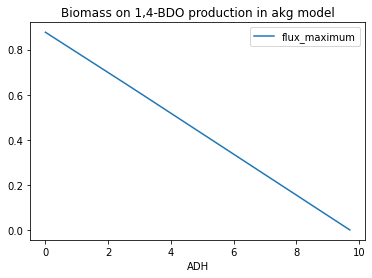

In [40]:
ppp_BIOMASS = production_envelope(model_akg,
                    reactions=[model_akg.reactions.ADH],
                    objective=model_akg.reactions.BIOMASS_Ec_iML1515_core_75p37M)
ppp_BIOMASS.plot(x='ADH', y='flux_maximum', title = 'Biomass on 1,4-BDO production in akg model' )

PhPP for Production of 1,4-BDO on glucose uptake in akg model

<AxesSubplot:title={'center':'Production of 1,4-BDO on glucose uptake in akg model'}, xlabel='EX_glc__D_e'>

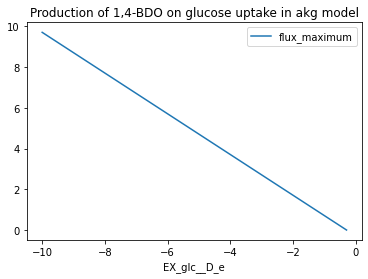

In [41]:
ppp_bdo = production_envelope(model_akg,
                    reactions=[model_akg.reactions.EX_glc__D_e],
                    objective=model_akg.reactions.ADH)
ppp_bdo.plot(x='EX_glc__D_e', y='flux_maximum', title = 'Production of 1,4-BDO on glucose uptake in akg model') 

PhPP for Production of 1,4-BDO on oxygen exchange reaction in akg model

<AxesSubplot:title={'center':'Production of 1,4-BDO on oxygen exchange reaction in akg model'}, xlabel='EX_o2_e'>

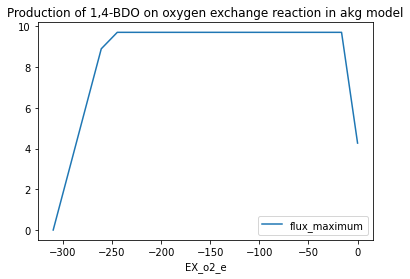

In [42]:
ppp_o2 = production_envelope(model_akg,
                    reactions=[model_akg.reactions.EX_o2_e],
                    objective=model_akg.reactions.ADH)

ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'Production of 1,4-BDO on oxygen exchange reaction in akg model')


## Phenotypic phase plane analysis for model sucd


PhPP for Biomass on 1,4-BDO production in sucd model

<AxesSubplot:title={'center':'Biomass on 1,4-BDO production in sucd model'}, xlabel='ADH'>

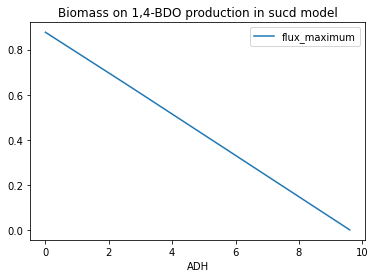

In [43]:
ppp_BIOMASS_s = production_envelope(model_sucd,
                    reactions=[model_sucd.reactions.ADH],
                    objective=model_sucd.reactions.BIOMASS_Ec_iML1515_core_75p37M)
ppp_BIOMASS_s.plot(x='ADH', y='flux_maximum', title = 'Biomass on 1,4-BDO production in sucd model' )

PhPP for Production of 1,4-BDO on glucose uptake in sucd model

<AxesSubplot:title={'center':'Production of 1,4-BDO on glucose uptake in sucd model'}, xlabel='EX_glc__D_e'>

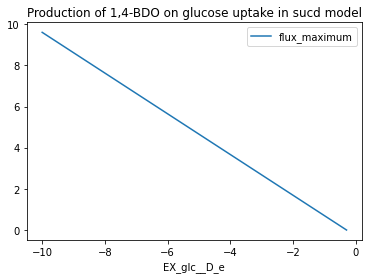

In [44]:
ppp_bdo_s = production_envelope(model_sucd,
                    reactions=[model_sucd.reactions.EX_glc__D_e],
                    objective=model_sucd.reactions.ADH)
ppp_bdo_s.plot(x='EX_glc__D_e', y='flux_maximum', title = 'Production of 1,4-BDO on glucose uptake in sucd model') 

PhPP for Production of 1,4-BDO on oxygen exchange reaction in sucd model

<AxesSubplot:title={'center':'Production of 1,4-BDO on oxygen exchange reaction in sucd model'}, xlabel='EX_o2_e'>

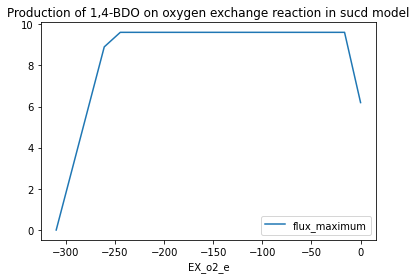

In [45]:
ppp_o2_s = production_envelope(model_sucd,
                    reactions=[model_sucd.reactions.EX_o2_e],
                    objective=model_sucd.reactions.ADH)

ppp_o2_s.plot(x='EX_o2_e', y='flux_maximum', title = 'Production of 1,4-BDO on oxygen exchange reaction in sucd model')


It can be clearly seen that the PhPP analyses do not differ between the two models (akg and sucd). This was expected, since the difference in the 1,4-BDO production from the two models is negligible.

From the first two analyses, we can see that there is a direct trade-off between 1,4-BDO production and biomass production and glucose uptake, respectively. PhPP analysis plot for production of 1,4-BDO and oxygen uptake depicts that these two fluxes are not directly coupled.



<AxesSubplot:title={'center':'Biomass on Glucose uptake in sucd model'}, xlabel='EX_glc__D_e'>

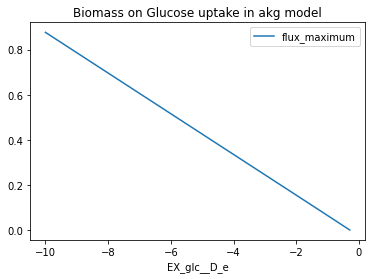

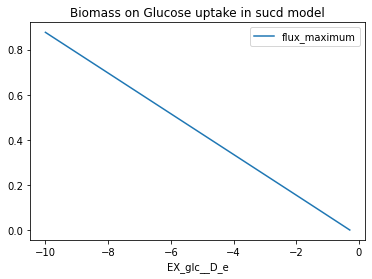

In [39]:
#not sure this is needed

ppp_BIOMASSS = production_envelope(model_akg,
                    reactions=[model_akg.reactions.EX_glc__D_e],
                    objective=model_akg.reactions.BIOMASS_Ec_iML1515_core_75p37M)
ppp_BIOMASSS.plot(x='EX_glc__D_e', y='flux_maximum', title = 'Biomass on Glucose uptake in akg model' )


ppp_BIOMASSSS = production_envelope(model_sucd,
                    reactions=[model_sucd.reactions.EX_glc__D_e],
                    objective=model_sucd.reactions.BIOMASS_Ec_iML1515_core_75p37M)
ppp_BIOMASSSS.plot(x='EX_glc__D_e', y='flux_maximum', title = 'Biomass on Glucose uptake in sucd model' )